<a href="https://colab.research.google.com/github/jvishnuvardhan/Stackoverflow_Questions/blob/master/Mnist_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tf-nightly

     |████████████████████████████████| 517.6MB 30kB/s 
     |████████████████████████████████| 460kB 40.7MB/s 
     |████████████████████████████████| 3.0MB 39.7MB/s 


In [3]:
import tensorflow as tf
from tensorflow import keras
tf.__version__

'2.2.0-dev20200410'

In [6]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
#  from keras.layers import Dropout
#  from keras.layers import Flatten
#  from keras.layers.convolutional import Conv2D
#  from keras.layers.convolutional import MaxPooling2D
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype('float32')
X_train = X_train / 255
X_test = X_test / 255
y_train = utils.to_categorical(y_train)
y_test = utils.to_categorical(y_test)
num_classes = y_test.shape[1]
def larger_model():
    model = Sequential()
    model.add(Conv2D(30, (5, 5), input_shape=(28, 28, 1), activation='relu'))
    model.add(MaxPooling2D())
    model.add(Conv2D(15, (3, 3), activation='relu'))
    model.add(MaxPooling2D())
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
model = larger_model()
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)
scores = model.evaluate(X_test, y_test, verbose=0)
print("Large CNN Error: %.2f%%" % (100-scores[1]*100))

model.save('good_model.h5')
print("Model saved")

Epoch 1/10
300/300 [==============================] - 37s 125ms/step - loss: 0.3762 - accuracy: 0.8838 - val_loss: 0.0881 - val_accuracy: 0.9728
Epoch 2/10
300/300 [==============================] - 38s 125ms/step - loss: 0.0993 - accuracy: 0.9700 - val_loss: 0.0527 - val_accuracy: 0.9821
Epoch 3/10
300/300 [==============================] - 38s 126ms/step - loss: 0.0716 - accuracy: 0.9778 - val_loss: 0.0401 - val_accuracy: 0.9871
Epoch 4/10
300/300 [==============================] - 38s 127ms/step - loss: 0.0592 - accuracy: 0.9822 - val_loss: 0.0362 - val_accuracy: 0.9880
Epoch 5/10
300/300 [==============================] - 37s 125ms/step - loss: 0.0490 - accuracy: 0.9846 - val_loss: 0.0334 - val_accuracy: 0.9894
Epoch 6/10
300/300 [==============================] - 37s 125ms/step - loss: 0.0431 - accuracy: 0.9864 - val_loss: 0.0278 - val_accuracy: 0.9903
Epoch 7/10
300/300 [==============================] - 37s 124ms/step - loss: 0.0373 - accuracy: 0.9882 - val_loss: 0.0322 - val_ac

In [48]:
import cv2
model = load_model('good_model.h5')
original_img = cv2.imread('test_img.png')
file = cv2.imread('test_img.png')
file = cv2.resize(file, (28, 28))
file = cv2.cvtColor(file, cv2.COLOR_BGR2GRAY)
file = cv2.bitwise_not(file)
file = file.reshape((-1, 28, 28,1))/255.
result = model.predict(file)
print(result[0])
t = (np.argmax(result[0]))
print("I predict this number is a:", t)

[1.7127850e-06 2.4761690e-03 9.3386835e-01 4.2888940e-05 6.1896522e-02
 2.2415628e-04 1.4620150e-03 1.0253626e-05 1.7689514e-05 2.3447313e-07]
I predict this number is a: 2


In [49]:
file.shape

(1, 28, 28, 1)

In [0]:
from matplotlib import pyplot as plt 

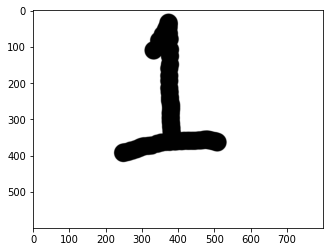

In [51]:
plt.imshow(original_img)

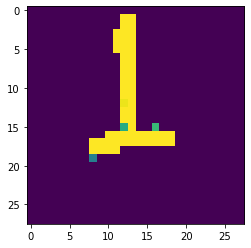

In [52]:
filess =tf.squeeze(file)
plt.imshow(filess)

In [0]:
print(file)

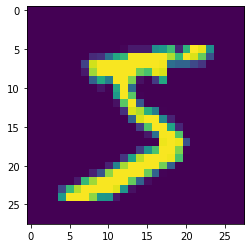

In [38]:
plt.imshow(tf.squeeze(X_train[0]))

In [54]:
import cv2
original_img = cv2.imread('test2_img.png')
file = cv2.imread('test2_img.png')
file = cv2.resize(file, (28, 28))
file = cv2.cvtColor(file, cv2.COLOR_BGR2GRAY)
# file = cv2.bitwise_not(file) Only need this for inverting colors
file = file.reshape((-1, 28, 28,1))/255.
result = model.predict(file)
print(result[0])
t = (np.argmax(result[0]))
print("I predict this number is a:", t)

[2.5916606e-07 5.9629826e-09 6.4900888e-07 1.4812304e-04 4.3022455e-10
 5.3353943e-09 6.2022468e-13 9.9984884e-01 7.7222313e-07 1.1966359e-06]
I predict this number is a: 7


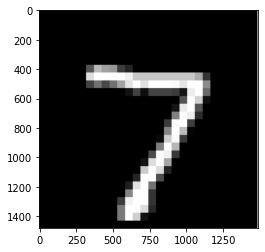

In [55]:
plt.imshow(original_img)

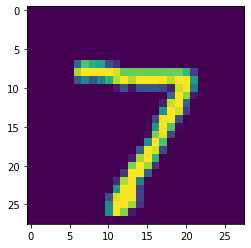

In [56]:
filess =tf.squeeze(file)
plt.imshow(filess)